In [20]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [21]:
# Read clean data
# df = pd.read_excel('Data/Great Asia Africa Text Clean.xlsx')
df = pd.read_excel('Data/Tangkuban Parahu Text Clean.xlsx')
df = df.dropna().reset_index(drop=True)

# Sampel
df = df.sample(n=300).reset_index(drop=True)
# df = df.head(300)

df

,Review,Review_clean
0,Udara nya dingin dan segar.. Bagus buat healing,udara nya dingin segar bagus healing
1,Salah satu cerita indonesia,salah cerita indonesia
2,Ramah.. adem dan adem..,ramah adem adem
3,Tangkuban Perahu merupakan salah satu destinas...,tangkuban perahu salah destinasi wisata kenal ...
4,1. Jarak tempuh dari pusat kota kurang lebih 1...,jarak tempuh pusat kota jam jalan mobil rincia...
...,...,...
295,Waktu kecil pernah kesini tour sekolah...skrng...,kesini tour sekolahskrng pnya ank ksni lg alha...
296,"Wisata terdekat untuk daerah Jawa barat,jika m...",wisata dekat daerah jawa baratjika kesana baik...
297,"Wisata alam yang unikk,\nBanyak spot foto,\nBa...",wisata alam unikkbanyak spot fotobanyak jugaya...
298,Oke,oke


In [22]:
text = df['Review_clean']

for i in text:
    print(i.split())

['udara', 'nya', 'dingin', 'segar', 'bagus', 'healing']
['salah', 'cerita', 'indonesia']
['ramah', 'adem', 'adem']
['tangkuban', 'perahu', 'salah', 'destinasi', 'wisata', 'kenal', 'bandung', 'daki', 'puncak', 'mudah', 'daki', 'selesai', 'mobil', 'lupa', 'unjung', 'kawah', 'ratu', 'jalan', 'cium', 'aroma', 'belerang', 'sengat', 'tempat', 'awat', 'parkir', 'luas', 'dagang', 'kaki']
['jarak', 'tempuh', 'pusat', 'kota', 'jam', 'jalan', 'mobil', 'rincian', 'biaya', 'harga', 'tiket', 'masuk', 'rp', 'ribuorg', 'parkir', 'rp', 'ribu', 'karcis', 'masuk', 'kendara', 'roda', 'rp', 'ribujadi', 'bawa', 'uang', 'ya', 'guys', 'hehe', 'tempat', 'bagus', 'bersih', 'view', 'gunung', 'tangkuban', 'perahu', 'minus', 'jual', 'souvenir', 'tawar', 'paksa', 'utk', 'beli', 'dagang', 'sgt', 'ganggu', 'dg', 'tsb', 'mhn', 'dpt', 'tegur']
['sejuk']
['lewat', 'sempat', 'unjung', 'gunung', 'rap', 'aktif', 'pandu', 'bagus', 'tip', 'siap', 'hadap', 'dagang', 'asong', 'butuh', 'uang', 'pamer', 'informatif', 'informasi'

In [23]:
text = df['Review_clean']
text_list =  [i.split() for i in text]

print(len(text_list))
print(text_list)

300
[['udara', 'nya', 'dingin', 'segar', 'bagus', 'healing'], ['salah', 'cerita', 'indonesia'], ['ramah', 'adem', 'adem'], ['tangkuban', 'perahu', 'salah', 'destinasi', 'wisata', 'kenal', 'bandung', 'daki', 'puncak', 'mudah', 'daki', 'selesai', 'mobil', 'lupa', 'unjung', 'kawah', 'ratu', 'jalan', 'cium', 'aroma', 'belerang', 'sengat', 'tempat', 'awat', 'parkir', 'luas', 'dagang', 'kaki'], ['jarak', 'tempuh', 'pusat', 'kota', 'jam', 'jalan', 'mobil', 'rincian', 'biaya', 'harga', 'tiket', 'masuk', 'rp', 'ribuorg', 'parkir', 'rp', 'ribu', 'karcis', 'masuk', 'kendara', 'roda', 'rp', 'ribujadi', 'bawa', 'uang', 'ya', 'guys', 'hehe', 'tempat', 'bagus', 'bersih', 'view', 'gunung', 'tangkuban', 'perahu', 'minus', 'jual', 'souvenir', 'tawar', 'paksa', 'utk', 'beli', 'dagang', 'sgt', 'ganggu', 'dg', 'tsb', 'mhn', 'dpt', 'tegur'], ['sejuk'], ['lewat', 'sempat', 'unjung', 'gunung', 'rap', 'aktif', 'pandu', 'bagus', 'tip', 'siap', 'hadap', 'dagang', 'asong', 'butuh', 'uang', 'pamer', 'informatif', 

# Creating Bigram & Trigram Models

Bigrams adalah dua kata yang sering muncul bersama dalam dokumen. Trigram adalah 3 kata yang sering muncul.

In [24]:
import gensim

#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.

bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [26]:
for idx in range(len(text_list)):
    for token in trigram[text_list[idx]]:
        print(token)

udara
nya
dingin
segar
bagus
healing
salah
cerita
indonesia
ramah
adem
adem
tangkuban_perahu
salah
destinasi
wisata
kenal
bandung
daki
puncak
mudah
daki
selesai
mobil
lupa
unjung
kawah
ratu
jalan
cium
aroma
belerang
sengat
tempat
awat
parkir
luas
dagang
kaki
tangkuban_perahu
tangkuban_perahu
tangkuban_perahu
jarak
tempuh
pusat
kota
jam
jalan
mobil
rincian
biaya
harga
tiket_masuk
rp
ribuorg
parkir
rp
ribu
karcis
masuk
kendara
roda
rp
ribujadi
bawa
uang
ya
guys
hehe
tempat
bagus
bersih
view
gunung
tangkuban_perahu
minus
jual
souvenir
tawar
paksa
utk
beli
dagang
sgt
ganggu
dg
tsb
mhn
dpt
tegur
tangkuban_perahu
tiket_masuk
tangkuban_perahu
tangkuban_perahu
sejuk
lewat
sempat
unjung
gunung
rap
aktif
pandu
bagus
tip
siap
hadap
dagang
asong
butuh
uang
pamer
informatif
informasi
letus
lihat
jam
daki
kawah
unjung
kawah
utama
gas
racun
kawah
samping
tarik
anjur
gunung_rap
gunung_rap
alam
pandang
bagus
jalan
badai
petir
tunggu
hujan
reda
alam
bagus
pergi
dukung
duduk
beli
barangbarang
tawar
cerda

# Create the Dictionary

Dua input utama untuk Topic Modeling LDA adalah dictionary dan corpus.

Buat kamus dari ‘text_list’ yang berisi berapa kali sebuah kata muncul di training set.

In [27]:
from gensim import corpora, models

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
# dictionary.filter_extremes(no_below=5, no_above=0.2) 
dictionary.filter_extremes() 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<152 unique tokens: ['bagus', 'dingin', 'nya', 'udara', 'cerita']...>


In [28]:
len(text_list)

300

In [29]:
dictionary

# Create the Corpus

Gensim membuat id unik untuk setiap kata dalam dokumen. Korpus yang dihasilkan ditunjukkan di atas adalah pemetaan dari (word_id, word_frequency).

Misalnya , (6, 1) di atas menyiratkan, kata id 6 muncul sekali dalam dokumen pertama. Demikian juga, kata id 10 muncul dua kali dan seterusnya.

In [30]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

#The function doc2bow converts document (a list of words) into the bag-of-words format
'''Fungsi doc2bow() hanya menghitung jumlah kemunculan setiap kata yang berbeda, 
mengubah kata tersebut menjadi id kata bilangan bulatnya 
dan mengembalikan hasilnya sebagai vektor renggang. 
Oleh karena itu, vektor renggang [(0, 1), (1, 1)] berbunyi: dalam 
dokumen “Interaksi manusia-komputer”, kata komputer (id 0) dan 
manusia (id 1) muncul satu kali; sepuluh kata kamus lainnya muncul (secara implisit) nol kali.'''

print(len(doc_term_matrix))
# print(doc_term_matrix[1])


300


In [32]:
print(doc_term_matrix[4])

[(0, 1), (11, 1), (13, 1), (18, 1), (20, 1), (21, 1), (25, 1), (26, 3), (27, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 3), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]


In [33]:
df

,Review,Review_clean
0,Udara nya dingin dan segar.. Bagus buat healing,udara nya dingin segar bagus healing
1,Salah satu cerita indonesia,salah cerita indonesia
2,Ramah.. adem dan adem..,ramah adem adem
3,Tangkuban Perahu merupakan salah satu destinas...,tangkuban perahu salah destinasi wisata kenal ...
4,1. Jarak tempuh dari pusat kota kurang lebih 1...,jarak tempuh pusat kota jam jalan mobil rincia...
...,...,...
295,Waktu kecil pernah kesini tour sekolah...skrng...,kesini tour sekolahskrng pnya ank ksni lg alha...
296,"Wisata terdekat untuk daerah Jawa barat,jika m...",wisata dekat daerah jawa baratjika kesana baik...
297,"Wisata alam yang unikk,\nBanyak spot foto,\nBa...",wisata alam unikkbanyak spot fotobanyak jugaya...
298,Oke,oke


# MODEL

In [34]:
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

# Coherence score

Penentuan banyaknya model topik dilakukan dengan cara melihat visualisasi pada grafik coherence score. Coherence score adalah ukuran yang digunakan untuk mengevaluasi Topic Modeling, model yang baik akan menghasilkan topik dengan skor koherensi topik yang tinggi.

Semakin besar coherence score, maka semakin baik pula hasil interpretasi topic modeling yang dihasilkan. Coherence score yang dihasilkan pada jumlah topik tersebut adalah sebesar 0.450204. Berdasarkan hasil terbaik pada nilai coherence score tersebut, maka dapat diambil 12 topik.

In [35]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

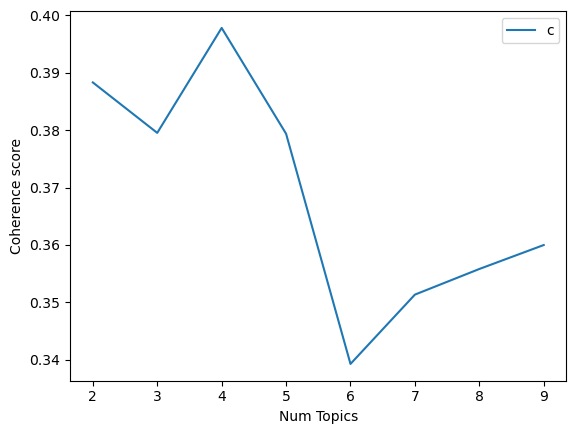

In [36]:
start=2
limit=10
step=1

model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [38]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 2  has Coherence Value of 0.388329
Num Topics = 3  has Coherence Value of 0.379531
Num Topics = 4  has Coherence Value of 0.397832
Num Topics = 5  has Coherence Value of 0.379383
Num Topics = 6  has Coherence Value of 0.339246
Num Topics = 7  has Coherence Value of 0.351331
Num Topics = 8  has Coherence Value of 0.355798
Num Topics = 9  has Coherence Value of 0.359978


# Building the Topic Model

Setelah memiliki semua yang diperlukan untuk melatih model LDA. Selain korpus dan kamus, Kita perlu memberikan jumlah topiknya juga. Jumlah topik yang diperoleh tadi adalah sebanyak 12.

In [39]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.032*"pandang" + 0.028*"kunjung" + 0.027*"tarik" + 0.024*"kesan" + 0.022*"gunung" + 0.022*"indah" + 0.020*"bagus" + 0.020*"gunung_rap" + 0.019*"jual" + 0.019*"ramai"
Topic: 1 Word: 0.047*"dingin" + 0.038*"sejuk" + 0.036*"alam" + 0.034*"indah" + 0.031*"wisata" + 0.025*"keren" + 0.023*"udara" + 0.020*"pandang" + 0.019*"wisata_alam" + 0.016*"nyaman"
Topic: 2 Word: 0.031*"bagus" + 0.031*"pandang" + 0.024*"tangkuban_perahu" + 0.019*"oke" + 0.018*"kawah" + 0.017*"gunung_rap" + 0.016*"mahal" + 0.015*"masuk" + 0.015*"banget" + 0.015*"bau_belerang"
Topic: 3 Word: 0.053*"bagus" + 0.038*"indah" + 0.024*"kawah" + 0.018*"jalan" + 0.017*"pandang" + 0.016*"kesini" + 0.015*"tangkuban_perahu" + 0.014*"keren" + 0.014*"aktif" + 0.014*"dingin"


# Topic: 0 Word: 0.036*"pandang" + 0.034*"keren" + 0.031*"indah" + 0.029*"banget" + 0.027*"ramai" + 0.025*"alam" + 0.023*"tempat" + 0.021*"foto" + 0.020*"bagus" + 0.019*"gunung_rap"

# Topic: 1 Word: 0.038*"indah" + 0.031*"tangkuban_perahu" + 0.030*"bagus" + 0.021*"kawah" + 0.021*"keluarga" + 0.020*"pas" + 0.020*"alam" + 0.018*"nya" + 0.018*"wisata" + 0.016*"murah"

# Topic: 2 Word: 0.035*"udara" + 0.025*"wisata" + 0.024*"dingin" + 0.024*"rekomendasi" + 0.023*"cocok" + 0.022*"kunjung" + 0.020*"jalan" + 0.018*"tangkuban_perahu" + 0.018*"tangkuban_parahu" + 0.017*"segar"

# Topic: 3 Word: 0.035*"dingin" + 0.033*"bagus" + 0.030*"mantap" + 0.028*"tempat" + 0.024*"mahal" + 0.024*"bersih" + 0.021*"kawah" + 0.016*"pandang" + 0.015*"tangkuban_perahu" + 0.015*"tiket_masuk"

# Bagaimana menginterpretasikannya?

Topik 0 diwakili sebagai 0.103*”makan” + 0.075*”halal” + 0.063*”pedas” + 0.053*”korea” + 0.052*”lokasi” + 0.045*”murah” + 0.036*”lokasinya” + 0.034*”menu” + 0.031*”cafe” + 0.027*”nyaman”

Ini berarti 10 kata kunci teratas yang berkontribusi pada topik ini adalah: ‘makan’, ‘pedas’, ‘halal’, ‘korea’ .. dan seterusnya dan bobot ‘halal’ pada topik 0 adalah 0,075. Bobot mencerminkan betapa pentingnya kata kunci untuk topik itu.

# Menyimpan top word dalam bentuk csv

In [89]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df_hasil = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
df_hasil

# Topic Modeling Visualization

PyLDAvis dirancang untuk membantu pengguna menafsirkan topik dalam model topik yang sesuai dengan kumpulan data teks. Paket ini mengekstraksi informasi dari model topik LDA yang dipasang untuk menginformasikan visualisasi berbasis web interaktif. Visualisasi ini digunakan dalam notebook IPython tetapi juga dapat disimpan ke file HTML yang berdiri sendiri untuk memudahkan berbagi (pypi, 2018). PyLDAvis menyediakan dua panel visualisasi sebagai yang ditunjukkan pada panel sisi kiri menunjukkan topik secara keseluruhan. Pada panel bagian kiri juga dapat dilihat hubungan atau korelasi antara topik satu dengan yang lain dengan melihat peta jarak antar topik. Adapun bagian panel sebelah kanan memperlihatkan distribusi frekuensi kata yang muncul pada setiap topik yang dihasilkan.

Gambar di atas merupakan hasil visualisasi dari topic modeling, terdapat 3 topik yang akan aku bahas, apabila dipilih topik nomor 1, maka warna lingkaran akan berubah menjadi merah dan pada panel bagian kanan akan langsung menyesuaikan dengan memperlihatkan sejumlah 30 terminologi yang paling relevan terhadap topik tersebut. Bar chart berwarna biru pada panel bagian kanan mengindikasikan term frequency secara keseluruhan dalam corpus. Sedangkan bar chart berwarna merah menunjukkan estimasi term frequency pada topik yang dimaksud. Berikut disajikan visualisasi Topic modelling pada lingkaran nomor 1, 2, dan 3 yang menunjukkan hal yang paling responden ingin tanyakan terkait wisata kuliner yang ada di Kota Yogyakarta (karena dari part 1, data yang aku gunain adalah data pertanyaan tentang kulier di Kota Yogyakarta). Meskipun terdapat tiga topik yang banyak membahas mengenai “lokasi” wisata kuliner, ketiga topik tersebut memiliki model yang unik dan dapat merepresentasikan kesan lokasi yang berbeda.

In [90]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.072515  0.010042       1        1  28.552285
1      0.024348 -0.066333       2        1  26.280266
0      0.054771  0.044236       3        1  23.904547
3     -0.006604  0.012055       4        1  21.262902, topic_info=                 Term       Freq      Total Category  logprob  loglift
2    tangkuban_perahu   9.000000   9.000000  Default  30.0000  30.0000
41              indah  15.000000  15.000000  Default  29.0000  29.0000
110        gunung_rap   5.000000   5.000000  Default  28.0000  28.0000
12               alam   7.000000   7.000000  Default  27.0000  27.0000
105              adem   3.000000   3.000000  Default  26.0000  26.0000
..                ...        ...        ...      ...      ...      ...
29              udara   1.393291   6.328476   Topic4  -4.5116   0.0348
118             sejuk   1.395792   6.434653   Topic4  -4.5098   0

# WORDCLOUD

In [93]:
# Teks untuk wordcloud
teks_all = df['Review_clean'].to_list()
teks_all = ' '.join(teks_all)
teks_all

'tangkuban perahu tempat tarik bagus enak wisata ramai unjung ga bagi parkir pemandanganya ok plus kondisi alam nya terjagaminus tiket masuk laku utk lokasi utk masuk kawah domas bayar tiket parkir kendara utk masuk pala mohon ditertibkannomor menggangu nyaman tangkuban parahu bintang railguard pagar pinggir tambah tinggi alhamdulillah duduk indonesia tinggi pagar udara dingin udara dingin kesana hujan untung kawah tutup kabut wisata cocok keluarga seru arah pintu gerbang tikung asstro highland jalan lokasi lumayan pintu gerbang beli tiket masuk harga tiket masuk orang k kendara roda k tata parkir k indah nyaman refresing cocok bawa keluarga piknik dateng pagi pas kabut puncak gunung mudah transit mobil belah kawah salah tuju wisata bandung lembang lewat halhal dua tangkuban perahu beda bersih tata tata lokasi wisata nyaman mudah nikmat suasana bagus mantap pandang bagus cuaca bagus suka tinggi m muka laut pandang bandung udara nya dingin segar bagus healing indah pandang nya tangkuban

In [94]:
# Wordcloud review
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')
wordcloud.generate(teks_all)

c:\Users\satri\AppData\Local\Programs\Python\Python39\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


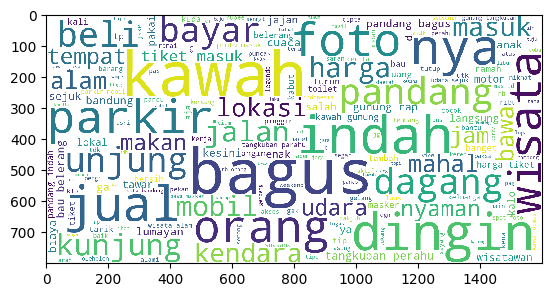

In [95]:
# Show Wordcloud
plt.imshow(wordcloud, interpolation="None")